**Punkte**

| Aufgabe 1 | Aufgabe 2 | Aufgabe 3 | Aufgabe 4 |
|-----------|-----------|-----------|-----------|
|           |           |           |           |
|     / 55  |     / 15  |     / 25  |     /  5  |
|           |           |           |           |

Gesamtpunktzahl:

___

# Allgemeine Hinweise zur Klausur 01882 **Data Engineering für Data Science**
> **_NOTE:_**  *Bitte lesen Sie sich diese Hinweise vor der Bearbeitung der Klausur aufmerksam durch.*

- Die **Klausurdauer** beträgt **2 Stunden**.
- Bevor Sie mit der Bearbeitung der Klausuraufgaben beginnen, tragen Sie bitte Ihre(n) **Nachnamen**, Ihre(n) **Vornamen** und Ihre **Matrikelnummer** in die vorgesehenen Felder (oben) ein.
- Wie schon in den Übungsaufgaben erfolgt die Bearbeitung in zwei unterschiedliche Zell-Typen: In **Code-Zellen** sollen Sie (Python-)Code (bei Bedarf kommentiert) einfügen und ausführen. In **Raw-Zellen** erwarten wir eine Antwort in Textform.
- Sollten bestimmte Fakten aus Ihrer Sicht nicht eindeutig formuliert sein, so schreiben Sie Ihre Annahmen zur Lösung dazu.
- Denken Sie bei Plots an Titel, Achsenbeschriftung und bei Bedarf Legende.
- Es empfiehlt sich, das Notebook, bzw. das daraus generierte PDF in regelmäßigen Abständen zu sichern. So müssen Sie nicht bei Null anfangen, sollte es unerwartetere Weise zu Software-Problemen kommen.
- Diese Klausur ist eine sogenannte "Open-Book-Klausur", was bedeutet, dass Sie alle Vorlesungsunterlagen, etc. als Hilfsmittel verwenden dürfen. Es ist jedoch ausdrücklich **verboten**, dass Sie untereinander kommunizieren oder andere Personen zu Rate ziehen. 

___

In [383]:
# Imports
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import iplantuml
import re
import numpy as np
from pyspark.sql import SparkSession
import pyspark.sql.functions as f

## Aufgabe 1 - Datenvorverarbeitung und Datenqualität: Das Jugendzentrum Pixhagen (55 Punkte)
Ein fiktives Szenario: Das Jugendzentrum Pixhagen ist ein beliebter Treffpunkt für Jugendliche aus allen vier Stadtteilen (Nord, Ost, Süd, West). Es hat jeden Tag in der Woche von 12-22 Uhr geöffnet. Neben diversen Gemeinschaftsräumen, in denen man sich die Zeit vertreiben kann, werden auch unterschiedliche Aktivitäten wie z.B. ein Pizzakurs oder eine Fußballgruppe angeboten. Da unerwartet Budget frei geworden ist, um eine neue Aktivität anzubieten, wurde kurzfristig eine Umfrage unter den Jugendlichen durchgeführt. Die Daten der Umfrage sollen dazu verwendet werden, herauszufinden, welche neue Aktivität angeboten werden soll und an welchem Wochentag. Die durchzuführende Analyse ist Inhalt dieser Klausur. Zeitpunkt der Analyse ist der heutige Tag.

Folgende Dokumente stehen Ihnen zur Verfügung:
- *umfrage.csv* - Die Daten der Umfrage
- *bericht.pdf* - Ein Bericht, in dem unterschiedliche Informationen zum Jugendzentrum und zur Umfrage dokumentiert sind

### Aufgabe 1.1 Daten laden (1 Punkt)
*Laden Sie die Daten (`umfrage.csv`) in ein DataFrame namens `df`, so dass der Index rein numerisch ist.*

In [277]:
df = pd.read_csv('./umfrage.csv')
df

,id,stadtteil,alter,entfernung,mo,di,mi,do,fr,sa,so,favorit
0,W1933,West,9,2.57,Nein,Ja,Nein,Ja,Nein,Ja,Ja,Malen
1,W3885,West,9,2.44,Nein,Nein,Ja,Nein,Nein,Ja,Ja,Malen
2,W2138,West,17,2.84,N,N,N,N,J,J,J,Kochen
3,O2881,Ost,10,1.70,Ja,Nein,Ja,Nein,Ja,Ja,Ja,Werken
4,N1952,Nord,9,0.87,Nein,Nein,Ja,Nein,Nein,Ja,Nein,Musik
...,...,...,...,...,...,...,...,...,...,...,...,...
106,N1026,Nord,19,0.29,J,N,J,N,N,J,N,Sport
107,S3495,Süd,12,NaN,N,N,J,J,J,N,J,Sport
108,N1102,Nord,12,0.44,Nein,Nein,Nein,Ja,Ja,Ja,Ja,Sport
109,O4397,Ost,14,1.59,N,N,N,J,J,J,N,Kochen


### Aufgabe 1.2 Data Integrity (6 Punkte)
Machen Sie sich mit den Daten vertraut.

*Wählen Sie aus den 5 Kriterien für **Data Integrity**, die Sie im Buch von McGregor in Kapitel 3 als **Important** kennengelernt haben, 3 Ihrer Wahl aus und beurteilen Sie die Daten anhand dieser Kriterien.*

In [278]:
#complete
df.isna().sum()

id            0
stadtteil     0
alter         0
entfernung    4
mo            0
di            0
mi            0
do            0
fr            0
sa            0
so            0
favorit       7
dtype: int64

In [279]:
df[df['entfernung'].isnull()]

,id,stadtteil,alter,entfernung,mo,di,mi,do,fr,sa,so,favorit
25,W3708,West,10,NaN,Ja,Nein,Ja,Ja,Ja,Ja,Ja,Werken
38,N1356,Nord,16,NaN,Nein,Ja,Nein,Nein,Nein,Ja,Ja,Kochen
69,N2718,Nord,17,NaN,Nein,Nein,Nein,Ja,Ja,Nein,Nein,Kochen
107,S3495,Süd,12,NaN,N,N,J,J,J,N,J,Sport


In [280]:
#low variance means that the data points tend to be very close to the mean, and thus, the mean is a good measure of central tendency.
df.groupby('stadtteil')['entfernung'].var()

stadtteil
Nord    0.193040
Ost     0.201104
Süd     0.346716
West    0.179945
Name: entfernung, dtype: float64

In [281]:
# High volume: reicht das Volumen des Datensatzes aus, um die Hauptfrage zu beantworten?
len(df)

111

In [282]:
participation_rate = (111 / 256) * 100
print(f"Die Teilnahmequote beträgt {participation_rate:.3f}%")

Die Teilnahmequote beträgt 43.359%


In [283]:
df['stadtteil'].value_counts()

stadtteil
Nord    52
West    24
Ost     23
Süd     12
Name: count, dtype: int64

In [284]:
df.groupby('stadtteil')['entfernung'].mean()

stadtteil
Nord    0.927400
Ost     2.186957
Süd     4.058182
West    2.300000
Name: entfernung, dtype: float64

In [285]:
#multivariant
#multivariate
# Check the number of variables (columns) in the dataset
if df.shape[1] > 1:
    print("Der Datensatz ist multivariant mit ", df.shape[1], " Variablen.")
else:
    print("Der Datensatz ist nicht multivariant.")


Der Datensatz ist multivariant mit  12  Variablen.


In [286]:
#atomic
def is_atomic(df):
    for column in df.columns:
        if df[column].apply(lambda x: isinstance(x, (list, dict))).any():
            return False
    return True

#überprüft,ob ein Element in der Spalte eine Instanz einer Liste oder eines dictionarys ist
print(is_atomic(df))

True


In [287]:
df.columns

Index(['id', 'stadtteil', 'alter', 'entfernung', 'mo', 'di', 'mi', 'do', 'fr',
       'sa', 'so', 'favorit'],
      dtype='object')

In [288]:
unique_values = df['id'].unique()
unique_values

df[df['id'].duplicated()]['id']

33    W4166
58    W1787
Name: id, dtype: object

In [289]:
#consistent
if(df.duplicated().any()):
    print("this dataset contains ", df.duplicated().sum() ," duplicates.")
    print(df[df.duplicated()])

else: print("this dataset does not contain duplicates.")

this dataset contains  2  duplicates.
       id stadtteil  alter  entfernung    mo    di    mi    do  fr  sa    so   
33  W4166      West     10        2.46  Nein  Nein  Nein    Ja  Ja  Ja    Ja  \
58  W1787      West     10        1.96  Nein  Nein  Nein  Nein  Ja  Ja  Nein   

   favorit  
33  Werken  
58  Werken  


In [290]:
for col in df.columns:
    display(df[col].value_counts())

id
W1787    2
W4166    2
W1933    1
O2550    1
N4654    1
        ..
N3859    1
O2083    1
O1511    1
N2138    1
S3600    1
Name: count, Length: 109, dtype: int64

stadtteil
Nord    52
West    24
Ost     23
Süd     12
Name: count, dtype: int64

alter
10    23
9     21
11    19
17     8
19     8
15     8
12     7
14     7
13     6
16     2
18     2
Name: count, dtype: int64

entfernung
0.59    3
1.59    2
1.20    2
2.38    2
2.67    2
       ..
1.62    1
2.30    1
1.25    1
1.58    1
4.76    1
Name: count, Length: 93, dtype: int64

mo
Nein    52
J       23
N       19
Ja      17
Name: count, dtype: int64

di
Nein    42
N       31
Ja      27
J       11
Name: count, dtype: int64

mi
Nein    47
N       24
Ja      22
J       18
Name: count, dtype: int64

do
Nein    37
Ja      32
N       26
J       16
Name: count, dtype: int64

fr
Ja      52
J       26
Nein    17
N       16
Name: count, dtype: int64

sa
Ja      54
J       30
Nein    15
N       12
Name: count, dtype: int64

so
Ja      49
J       21
N       21
Nein    20
Name: count, dtype: int64

favorit
Malen     30
Sport     22
Kochen    21
Werken    21
Musik     10
Name: count, dtype: int64

In [291]:
#clear
# Check column names for clarity
print("Column names:")
print(df.columns)

# Check unique values in each column
for column in df.columns:
    print(f"\nUnique values in {column}:")
    print(df[column].unique())

Column names:
Index(['id', 'stadtteil', 'alter', 'entfernung', 'mo', 'di', 'mi', 'do', 'fr',
       'sa', 'so', 'favorit'],
      dtype='object')

Unique values in id:
['W1933' 'W3885' 'W2138' 'O2881' 'N1952' 'N2003' 'N1456' 'N1418' 'S4836'
 'N1108' 'O4471' 'N2728' 'N1419' 'N2126' 'O4529' 'N3298' 'N4033' 'O4985'
 'W4166' 'W2857' 'S2455' 'W2481' 'N3661' 'N3771' 'S2093' 'W3708' 'W1284'
 'N3872' 'O2470' 'N3418' 'N2138' 'O1511' 'O2083' 'N3859' 'W1787' 'N4920'
 'N1383' 'N1356' 'N4315' 'O3261' 'N1895' 'N3069' 'W2185' 'O1177' 'N1814'
 'N1571' 'O1396' 'N1902' 'N1881' 'O2200' 'O1322' 'N3619' 'N2556' 'N2378'
 'N4108' 'O3574' 'N4300' 'W4416' 'O4777' 'N4560' 'W2556' 'W4503' 'N4037'
 'O4626' 'N3465' 'N1130' 'W1187' 'N2718' 'S3654' 'O3988' 'N3233' 'N2139'
 'S1858' 'W4549' 'O3196' 'N1653' 'W3364' 'N1379' 'S1292' 'O3472' 'N4654'
 'S2516' 'O2550' 'W3603' 'N4127' 'N1914' 'S3874' 'W1326' 'N1636' 'W1413'
 'S3799' 'W1953' 'O3533' 'N3413' 'N2839' 'W1666' 'N3232' 'O4305' 'N2393'
 'W2494' 'N2731' 'O2408' 'S37

In [292]:
#dimensionaly structured


### Aufgabe 1.3 Plausibilitätschecks (8 Punkte)

Entsprechend der Informationen aus dem Bericht sind verschiedene Plausibilitätschecks der Daten denkbar. Bei diesen Checks wird geprüft, ob sich die Informationen des Berichts in den Daten wiederspiegeln.

*Führen Sie vier Plausibilitätschecks Ihrer Wahl durch. Geben Sie bei jedem Check an, auf welche Information aus dem PDF Sie sich beziehen und, ob der Check fehlgeschlagen ist oder nicht.*

In [293]:
df['alter'].min()>=9 & df['alter'].max()<=19

True

In [294]:
missing_values = df.isnull().sum()
print("Fehlende Werte in jeder Spalte:\n", missing_values)

Fehlende Werte in jeder Spalte:
 id            0
stadtteil     0
alter         0
entfernung    4
mo            0
di            0
mi            0
do            0
fr            0
sa            0
so            0
favorit       7
dtype: int64


In [295]:
duplicates = df.duplicated(subset=['id'], keep=False)
print("Anzahl der Duplikate in der Spalte 'ID':", duplicates.sum())

Anzahl der Duplikate in der Spalte 'ID': 4


In [296]:
df[duplicates]

,id,stadtteil,alter,entfernung,mo,di,mi,do,fr,sa,so,favorit
18,W4166,West,10,2.46,Nein,Nein,Nein,Ja,Ja,Ja,Ja,Werken
33,W4166,West,10,2.46,Nein,Nein,Nein,Ja,Ja,Ja,Ja,Werken
35,W1787,West,10,1.96,Nein,Nein,Nein,Nein,Ja,Ja,Nein,Werken
58,W1787,West,10,1.96,Nein,Nein,Nein,Nein,Ja,Ja,Nein,Werken


In [297]:
inconsistent_data = (df['mo'] == 'Ja') & (df['favorit'].isnull())
print("Anzahl der inkonsistenten Daten:", inconsistent_data.sum())

df[inconsistent_data]

Anzahl der inkonsistenten Daten: 1


,id,stadtteil,alter,entfernung,mo,di,mi,do,fr,sa,so,favorit
104,S3745,Süd,11,3.67,Ja,Nein,Nein,Ja,Ja,Ja,Ja,NaN


In [298]:
df.groupby("stadtteil")["id"].first()

stadtteil
Nord    N1952
Ost     O2881
Süd     S4836
West    W1933
Name: id, dtype: object

In [299]:
import re
stadteil_mapping = {
"S":"Süd",
"W":"West",
"N":"Nord",
"O":"Ost",
}

# Ihre Lösung
regular_expression = "[A-Z]+" # <- fügen Sie hier den entsprechenden regulären Ausdruck ein
 
def check_id(id_, stadteil):
    stadteil_id = "".join(re.findall(regular_expression, id_))
    return stadteil_mapping.get(stadteil_id) == stadteil

# Ist der Check für alle Zeilen des Datensatzes erfolgreich?
df.apply(lambda x: check_id(x["id"], x["stadtteil"]), axis=1).all()

True

In [300]:
#Gültigkeitsprüfung

invalid_values = ~df['stadtteil'].isin(['Nord', 'Ost', 'Süd', 'West'])
print("Anzahl der ungültigen Werte in der Spalte 'Stadtteil':", invalid_values.sum())

Anzahl der ungültigen Werte in der Spalte 'Stadtteil': 0


In [301]:

invalid_values_favorit = ~df['favorit'].isin(['Kochen', 'Malen', 'Musik', 'Sport', 'Werken'])
print("Anzahl der ungültigen Werte in der Spalte 'favorit':", df[invalid_values_favorit])

Anzahl der ungültigen Werte in der Spalte 'favorit':         id stadtteil  alter  entfernung    mo    di    mi    do    fr    sa   
22   N3661      Nord     11        0.78  Nein  Nein    Ja  Nein  Nein  Nein  \
28   O2470       Ost     12        2.38  Nein    Ja  Nein  Nein    Ja    Ja   
51   O1322       Ost     19        1.69     N     N     N     N     N     N   
54   N2378      Nord     19        0.36     N     J     J     J     J     J   
59   W4416      West     15        2.42     N     N     N     N     J     J   
98   N3232      Nord      9        1.66  Nein    Ja    Ja  Nein  Nein    Ja   
104  S3745       Süd     11        3.67    Ja  Nein  Nein    Ja    Ja    Ja   

       so favorit  
22     Ja     NaN  
28     Ja     NaN  
51      J     NaN  
54      N     NaN  
59      J     NaN  
98   Nein     NaN  
104    Ja     NaN  


### Aufgabe 1.4 Data Cleaning (12 Punkte)
Für eine sinnvolle Analyse sind diverse Vorverarbeitungsschritte notwendig. 

*Führen Sie Vorverarbeitungsmaßnahmen durch, die Ihrer Meinung nach nötig sind, um die Qualität der Daten zu verbessern. Begründen Sie für jede Maßnahme Ihr Vorgehen.*


> **Achtung**: *Eine **Umbenennung** von Spalten ist aus Zeitgründen nicht notwendig!*

In [302]:
# Ihre Lösung
jein_recoding = {
    'J': 'Ja',
    'N': 'Nein'
}
df.columns[4:11]

Index(['mo', 'di', 'mi', 'do', 'fr', 'sa', 'so'], dtype='object')

In [303]:
#Spalten umbennen:
for col in df.columns[4:11]:
    df[col] = df[col].replace(jein_recoding)


df.iloc[:, 4:11]

,mo,di,mi,do,fr,sa,so
0,Nein,Ja,Nein,Ja,Nein,Ja,Ja
1,Nein,Nein,Ja,Nein,Nein,Ja,Ja
2,Nein,Nein,Nein,Nein,Ja,Ja,Ja
3,Ja,Nein,Ja,Nein,Ja,Ja,Ja
4,Nein,Nein,Ja,Nein,Nein,Ja,Nein
...,...,...,...,...,...,...,...
106,Ja,Nein,Ja,Nein,Nein,Ja,Nein
107,Nein,Nein,Ja,Ja,Ja,Nein,Ja
108,Nein,Nein,Nein,Ja,Ja,Ja,Ja
109,Nein,Nein,Nein,Ja,Ja,Ja,Nein


In [304]:
duplicates = df.duplicated(subset=['id'], keep=False)
print("Anzahl der Duplikate in der Spalte 'ID':", duplicates.sum())
df[duplicates]

Anzahl der Duplikate in der Spalte 'ID': 4


,id,stadtteil,alter,entfernung,mo,di,mi,do,fr,sa,so,favorit
18,W4166,West,10,2.46,Nein,Nein,Nein,Ja,Ja,Ja,Ja,Werken
33,W4166,West,10,2.46,Nein,Nein,Nein,Ja,Ja,Ja,Ja,Werken
35,W1787,West,10,1.96,Nein,Nein,Nein,Nein,Ja,Ja,Nein,Werken
58,W1787,West,10,1.96,Nein,Nein,Nein,Nein,Ja,Ja,Nein,Werken


In [305]:
df.drop_duplicates(subset=['id'], keep='first', inplace=True)
df.duplicated(subset=['id'], keep=False).sum()

0

In [306]:
#rename columns
columns_recoding = {
    'mo': 'montag',
    'di': 'dienstag',
    'mi': 'mittwoch',
    'do': 'donnerstag',
    'fr': 'freitag',
    'sa': 'samstag',
    'so': 'sonntag'
}
df = df.rename(columns=columns_recoding)
df

,id,stadtteil,alter,entfernung,montag,dienstag,mittwoch,donnerstag,freitag,samstag,sonntag,favorit
0,W1933,West,9,2.57,Nein,Ja,Nein,Ja,Nein,Ja,Ja,Malen
1,W3885,West,9,2.44,Nein,Nein,Ja,Nein,Nein,Ja,Ja,Malen
2,W2138,West,17,2.84,Nein,Nein,Nein,Nein,Ja,Ja,Ja,Kochen
3,O2881,Ost,10,1.70,Ja,Nein,Ja,Nein,Ja,Ja,Ja,Werken
4,N1952,Nord,9,0.87,Nein,Nein,Ja,Nein,Nein,Ja,Nein,Musik
...,...,...,...,...,...,...,...,...,...,...,...,...
106,N1026,Nord,19,0.29,Ja,Nein,Ja,Nein,Nein,Ja,Nein,Sport
107,S3495,Süd,12,NaN,Nein,Nein,Ja,Ja,Ja,Nein,Ja,Sport
108,N1102,Nord,12,0.44,Nein,Nein,Nein,Ja,Ja,Ja,Ja,Sport
109,O4397,Ost,14,1.59,Nein,Nein,Nein,Ja,Ja,Ja,Nein,Kochen


In [307]:
df_stadtteil = df.groupby('stadtteil')['entfernung'].mean()
df_stadtteil

stadtteil
Nord    0.927400
Ost     2.186957
Süd     4.058182
West    2.308571
Name: entfernung, dtype: float64

In [308]:
for stadtteil in df_stadtteil.index:
    df.loc[df["stadtteil"]==stadtteil, 'entfernung'] = df.loc[df["stadtteil"]==stadtteil, 'entfernung'].fillna(df_stadtteil[stadtteil])

In [309]:
df['entfernung'].isna().sum()

0

In [310]:
df["favorit"] = df["favorit"].fillna("Nicht angegeben")


In [311]:
df['favorit'].value_counts()

favorit
Malen              30
Sport              22
Kochen             21
Werken             19
Musik              10
Nicht angegeben     7
Name: count, dtype: int64

In [321]:
df['favorit'].value_counts()[["Malen", "Sport"]]

favorit
Malen    30
Sport    22
Name: count, dtype: int64

### Aufgabe 1.5 Analyse Stadtteil (3 + 3 Punkte)

*Gibt es einen Unterschied in der Anzahl Jugendlicher pro Stadtteil? Passt das Ergebnis zu den Informationen, die Sie über das Jugenzentrum haben? (3 Punkte)*

Interpretieren Sie die Aussage Ihres Codes, indem Sie die Antwort auf die Frage in die dafür vorgesehene Raw-Zelle schreiben.

In [322]:
df['stadtteil'].value_counts()

stadtteil
Nord    52
Ost     23
West    22
Süd     12
Name: count, dtype: int64

In [323]:
df.groupby('stadtteil')['entfernung'].mean()

stadtteil
Nord    0.927400
Ost     2.186957
Süd     4.058182
West    2.308571
Name: entfernung, dtype: float64

*Gibt es in der Wahl des Favoriten einen Unterschied in Abhängigkeit des Stadtteils? Beantworten Sie die Frage mithilfe von Kreisdiagrammen. Erstellen Sie dabei ein Kreisdiagramm pro Stadtteil. (3 Punkte)*

array([[<Axes: ylabel='Nord'>, <Axes: ylabel='Ost'>],
       [<Axes: ylabel='Süd'>, <Axes: ylabel='West'>]], dtype=object)

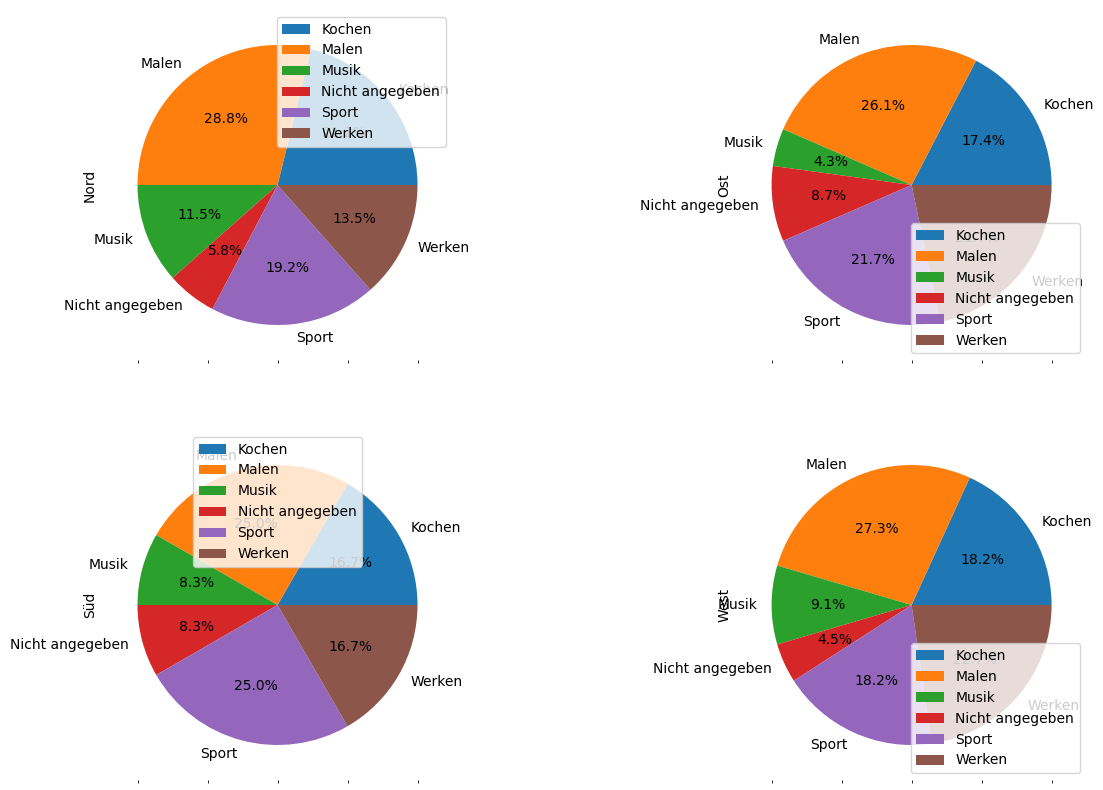

In [334]:
df.groupby(['stadtteil','favorit'])\
.size()\
.unstack('stadtteil')\
.plot(kind='pie',subplots=True, figsize=(15,10), layout=(2, 2), autopct='%1.1f%%')

### Aufgabe 1.6  Analyse Alter (2 + 3 Punkte)

*Analysieren Sie die Verteilung des Alters. Ist zu erkennen, ob eher jüngere oder eher ältere Jugendliche an der Umfrage teilgenommen haben? Entspricht die Verteilung der Befragten der aller Jugendlichen? (2 Punkte)*

In [337]:
df['alter'].describe()

count    109.000000
mean      12.330275
std        3.165365
min        9.000000
25%       10.000000
50%       11.000000
75%       15.000000
max       19.000000
Name: alter, dtype: float64

array([[<Axes: title={'center': 'alter'}>]], dtype=object)

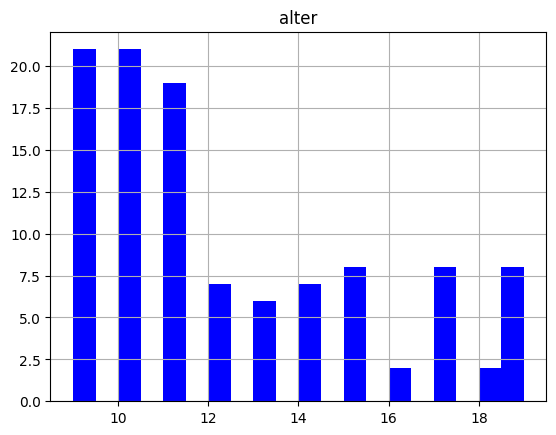

In [336]:
df.hist(column='alter', bins=20, color='blue')


*Hängt die Wahl des Favoriten vom Alter ab? Erstellen Sie zur Beantwortung der Frage ein Säulendiagramm, bei pro Alter die Anzahl des Favoriten gezählt wird. (3 Punkte)*

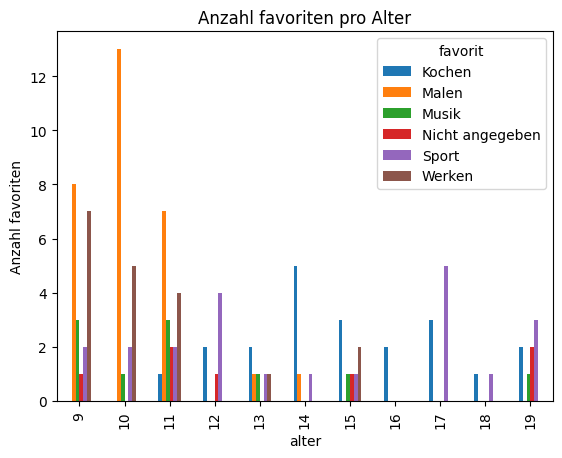

In [382]:
df.groupby(['alter','favorit'])\
.size()\
.unstack('favorit')\
.plot(kind='bar')

plt.title('Anzahl favoriten pro Alter')
plt.ylabel('Anzahl favoriten')  # Füge  
plt.show()

### Aufgabe 1.7 Analyse Wochentage (4 Punkte)
*An welchem Tag kommen die meisten Jugendlichen ins Jugendzentrum? Beantworten Sie die Frage mit einem Säulendiagramm.*

> **Achtung**: *Da diese Aufgabe etwas komplexer ist, gibt es hier einen Punkt mehr als bei den anderen Diagrammen.*

In [373]:
tage = df.columns[4:11].to_list()

besuche = []
for tag in tage:
    besuche.append(len(df[df[tag] == 'Ja']))
    
df_neu = pd.DataFrame({
'Tag': tage,
'Anzahl_besuche': besuche})

,Tag,Anzahl_besuche
0,montag,40
1,dienstag,38
2,mittwoch,40
3,donnerstag,47
4,freitag,76
5,samstag,82
6,sonntag,69


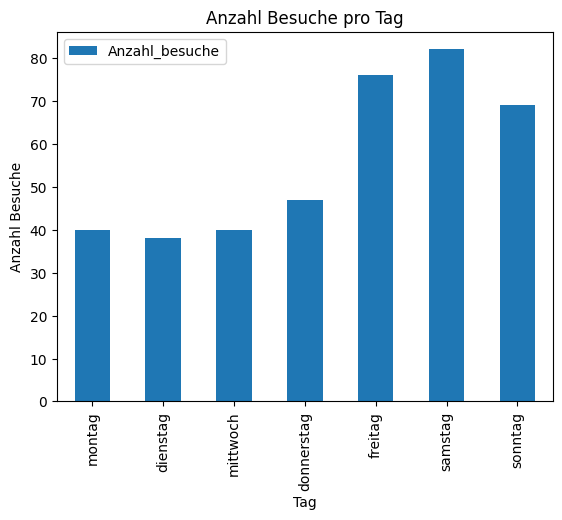

In [380]:
df_neu.plot(kind='bar', x='Tag', y='Anzahl_besuche')

plt.title('Anzahl Besuche pro Tag')
plt.ylabel('Anzahl Besuche') 
plt.xlabel('Tag')  # Füge

plt.show()


### Aufgabe 1.8 Data Fitness (6 Punkte)

*Entsprechend Ihrer Analysen: Beurteilen Sie die Data Fitness. Orientieren Sie sich dabei an den 3 Aspekten, die Sie im Buch von McGregor in Kapitel 3 kennengelernt haben (6 Punkte).*

### Aufgabe 1.9 Ergebnis (3 + 4 Punkte)

*Wenn Sie eine Entscheidung treffen müssten: Welche neue Aktivität sollte eingeführt werden und an welchem Wochentag? Beurteilen Sie die Aussagekraft dieses Ergebnisses in Bezug zu Ihrer Einschätzung von Data Fitness. (3 Punkte)*

*Nennen Sie die Aspekte, die bei der aktuellen Umfrage nicht beachtet wurden, aber Ihrer Meinung nach für den Anwendungsfall wichtig sind. Begründen Sie diese Aspekte und geben Sie außerdem an, welches Qualitätskriterium Sie damit verbessern würden. (4 Punkte)*

<span style="color:white">\newpage</span>.

## Aufgabe 2 - Big Data Analysis (15 Punkte)
In diesem Aufgabenbereich geht es um Hadoop und Spark.

### Aufgabe 2.1 Eigenschaften von Spark (3 Punkte)
Betrachten Sie folgendes Code-Beispiel:

> **Hinweis:** `**`-Operator = Potenz, z.B. `2**2 = 4`

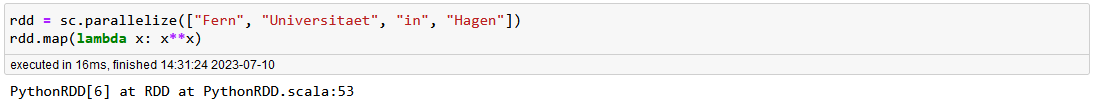

*Warum tritt hier kein Fehler auf, obwohl es nicht möglich ist, Strings zu potenzieren? Welches Prinzip von Spark liegt hier zugrunde, was bedeutet es und wofür ist es da? (3 Punkte)*

### Aufgabe 2.2 Caching (3 Punkte)
Betrachten Sie folgendes Code-Beispiel:

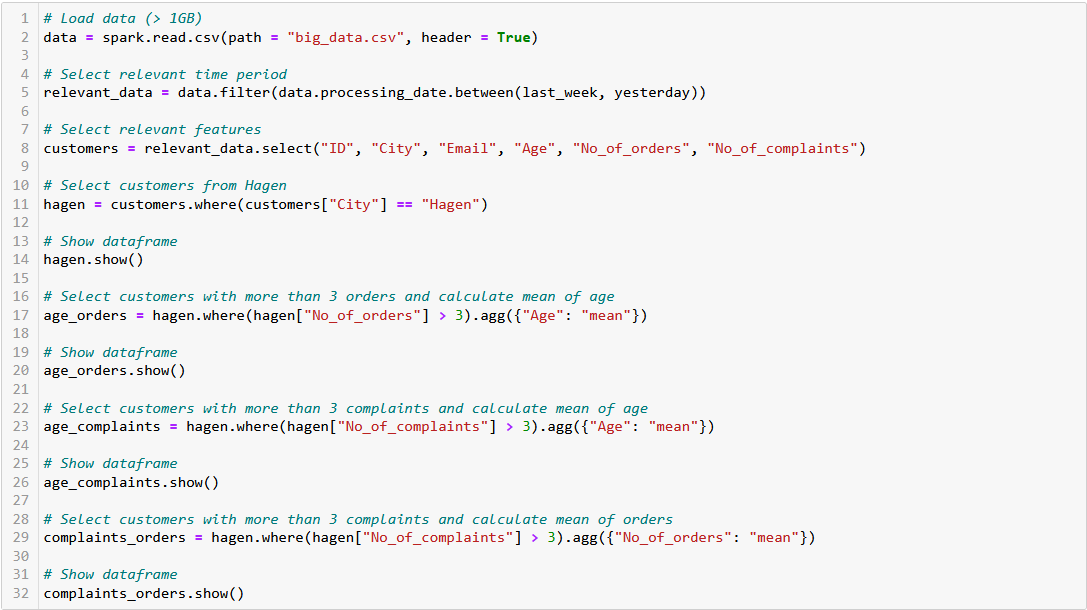

*In welcher Zeile wäre es sinnvoll ein Caching einzufügen und warum? (3 Punkte)*

In [ ]:
data = spark.read.csv(path = 'data.csv', header = True)
relevant_data = data.filter(data.processing_data.between(last_week, yesterday))
customers = relevant_data.select('ID', 'City', 'Email', 'Age', 'No_of_orders', 'No_of_complaints')

hagen = customers.where(customers['City']=='Hagen')
hagen.show()

age_orders = hagen.where(hagen['No_of_orders']>3).agg({'Age':'mean'})
age_orders.show()

age_complaints = hagen.where(hagen['No_of_complaints']>3).agg({'Age':'mean'})
age_complaints.show()

complaints_orders = hagen.where(hagen['No_of_complaints']>3).agg({'No_of_complaints':'mean'})
complaints_orders.show()

### Aufgabe 2.3 Ressourcenvebrauch (4 + 5 Punkte)
Nehmen Sie an, es steht ein Cluster mit 100GB RAM und 100 Kernen zur Verfügung.

Gegeben sei folgender Auszug aus der Datei `spark-defaults.conf`:

```
spark.executor.instances 5
spark.executor.memory 10G
spark.executor.cores 5
spark.executor.memoryOverhead 1GB

spark.yarn.am.cores 5
spark.yarn.am.memory 5G
spark.yarn.am.memoryOverhead 1G

spark.dynamicAllocation.enabled false
```

Es wird eine pyspark-Shell mit folgendem Aufruf gestartet (zu diesem Zeitpunkt laufen keine weiteren Spark-Anwendungen):

`pyspark --master yarn --num-executors 10 --executor-memory 7.5G`

*Berechnen Sie den Ressourcen-Verbrauch (Memory und Cores) der Spark-Anwendung. Geben Sie dabei Ihren Rechenweg an. (4 Punkte)*

Während die eben gestartete pyspark-Shell noch läuft, wird eine zweite pyspark-Shell mit folgendem Aufruf gestartet:

`pyspark --master yarn`

*Wie viele Ressourcen werden benötigt? Kann die Shell gestartet werden? Kann Spark-Code ausgeführt werden? Begründen Sie Ihre Antworten! (5 Punkte)*

<span style="color:white">\newpage</span>.

## Aufgabe 3 - Modellierung, NoSQL (25 Punkte)

Der landesweite Verband von Jugendzentren verwendet aktuell ein relationales Datenbanksystem (PostgreSQL) für die Datenverwaltung. 
Ein neuer Mitarbeiter der IT-Abteilung hat die Idee zu einem NoSQL Datenbanksystem zu wechseln und schlägt aufgrund der Beliebtheit MongoDB vor.

Die nachfolgende Grafik zeigt zunächst einen vereinfachten Ausschnitt des aktuellen physischen Datenbankschemas (PostgreSQL) des IT-Systems der Vereinigung von Jugendzentren.

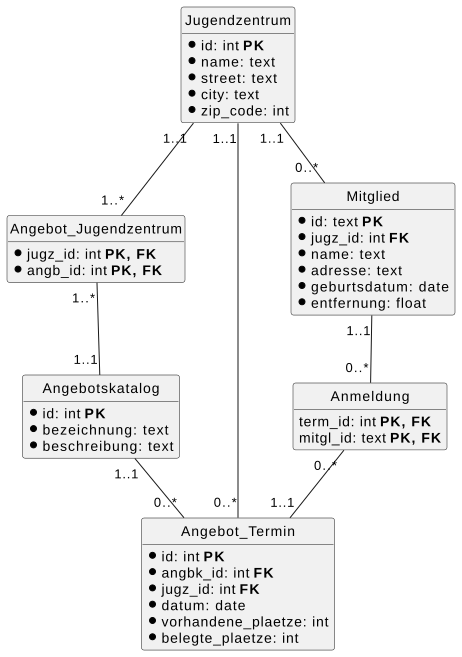

Für die Migration nach MongoDB wurden folgende Abfragen berücksichtigt. Diese erhalten außerdem bezüglich der Häufigkeit verschiedene Tags ("Sehr Häufig"; "Regelmäßig"; "Selten").

**Leseoperationen:**

- **R1** (Sehr Häufig). Gegeben ist eine *Jugendzentrum.id*, gebe folgende Attribute aus: *Angebotskatalog.id*, *Angebotskatalog.bezeichnung* und *Angebotskatalog.beschreibung*. 
    - **Beschreibung:** Mit dieser Abfrage werde alle Angebote, die ein bestimmtes Jugendzentrum anbietet angezeigt. 
- **R2** (Sehr Häufig). Gegeben ist eine *Jugendzentrum.id*, eine *Angebotskatalog.id* und ein *Datumsbereich*, gebe folgende Attribute aus: *Angebot_Termine.datum* und *Angebot_Termine.freie_plaetze*.
    - **Beschreibung:** Für ein bestimmtes Jugendzentrum, einen angegebenen Datumsbereich und ein bestimmtes Angebot, werden die noch freie Plätze der Termine angezeigt. 
- **R3** (Regelmäßig). Gegeben ist eine *Jugendzentrum.id* und ein *Datumsbereich*, gebe folgende Attribute aus: *Angebotskatalog.bezeichnung*, *Angebot_Termine.datum* und  *Mitglied.name* von Mitgliedern die sich für den Termin angemeldet haben.
    - **Beschreibung:** Mit dieser Abfrage lassen sich für ein bestimmtes Jugendzentrum und einem bestimmten Datumsbereich Listen mit den Namen der angemeldeten Mitglieder zu den vorhandenen Terminen der verschidenen Angebote ausgeben.
- **R4** (Selten). Gegeben ist eine *Jugendzentrum.id*, gebe folgende Attribute aus: *Angebotkatalog.id*, *Angebotkatalog.bezeichnung* und *anzahl_voll_ausgebucht* dessen Termine voll ausgebucht waren.
    - **Beschreibung:** Für ein bestimmtes Jugendzentrum wird eine Liste der Angebote ausgegeben die nach Anzahl voll ausgebuchter Plätze sortiert ist. 
- **R5** (Selten). Gegeben ist eine *Jugendzentrum.id*, gebe folgende Attribute aus: *Mitglied.id*, *Mitglied.name*, sowie die  *Wochentage* (z.B. 0-6) , an denen Anmeldungen zu Terminen vorlagen.
    - **Beschreibung:** Für ein bestimmtes Jugendzentrum wird eine Liste aller Mitglieder ausgegeben, für die jeweils angegeben ist, an welchen Wochentagen Anmeldungen zu Angeboten vorgenommen wurden.

**Schreiboperationen**

- **W1** (Selten). Gegeben ist eine *Jugendzentrum.id*, füge ein neues Mitglied (*name*, *adresse*, *geburtsdatum*, *entfernung*) hinzu.
    - **Beschreibung:** Neue Mitglieder werden einem bestimmten Jugendzentrum hinzugefügt. 
- **W2** (Regelmäßig). Gegeben ist eine *Jugendzentrum.id* und eine *Angebotskatalog.id*, füge einen neuen *Angebot_Termin* (*datum*, *vorhandene_plaetze*) hinzu.
    - **Beschreibung:** Für ein bestimmtes Jugendzentrum wird für ein Angebot ein neuer Termin hinzugefügt. 
- **W3** (Sehr Häufig). Gegeben ist eine *Mitglied.id* und eine *Angebot_Termin.id*, füge eine neue Anmeldung hinzu.
    - **Beschreibung:** Ein Mitglied wird für einen vorhandenen Termin angemeldet. 

Bei der Modellierung von Anmeldungen bezüglich angebotener Termine ist sich der Mitarbeiter allerdings unsicher und benötigt Unterstützung.
Im folgenden eine Darstellung des aktuellen Stands des migrierten Schemas (MongoDB):

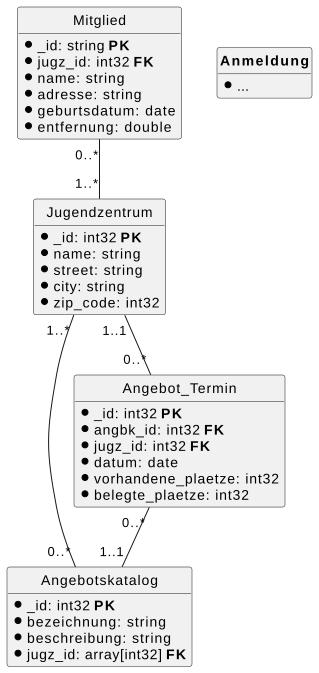

### Aufgabe 3.1 (2 Punkte)

Embedded vs. referentielle Modellierung bei dokumentorientierten Datenbanksystemen wie MongoDB.

Geben Sie zunächst Modellierungsrichtlinien bzw. Anwendungscharakteristika an, die einen starken Einfluss auf die Modellierung haben (embedded vs. referenziell).

### Aufgabe 3.2 (3 Punkte)  
    
Bei der Modellierung der *Anmeldungen* stellt sich die Frage diese zu referenzieren oder in *Angebot_Termin* einzubetten. Auf welche Abfragen hat diese Entscheidung eine Auswirkung?

Begründen Sie außerdem weshalb dies eine Auswirkung auf die entpsrechenden Abfragen hat.

### Aufgabe 3.3 (8 Punkte)  
    
Helfen Sie nun bei der Migration, indem Sie zunächst die Modellierung der *Anmeldung* vervollständigen. Begründen Sie Ihre Entscheidung, um diese den anderen Mitarbeitern nachvollziehbar darzulegen.

Vervollständigen Sie hierzu das nachfolgende Modell.

*HINWEIS:* Modellieren Sie eine Einbettung als "Composition".

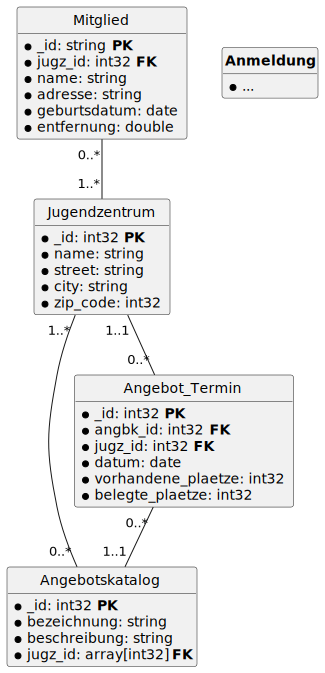

In [385]:
%%plantuml 

@startuml

hide circle
hide members
show fields

class "Jugendzentrum" as jz {
    * _id: int32 **PK**
    * name: string
    * street: string
    * city: string
    * zip_code: int32
}

class "Angebotskatalog" as a {
    * _id: int32 **PK**
    * bezeichnung: string
    * beschreibung: string
    * jugz_id: array[int32] **FK**
}

class "Angebot_Termin" as t {
    * _id: int32 **PK**
    * angbk_id: int32 **FK**
    * jugz_id: int32 **FK**
    * datum: date
    * vorhandene_plaetze: int32
    * belegte_plaetze: int32
}

class "**Anmeldung**" as an  {
    * ...
}


class "Mitglied" as m {
    * _id: string **PK**
    * jugz_id: int32 **FK**
    * name: string
    * adresse: string
    * geburtsdatum: date
    * entfernung: double
}


jz "1..*" -- "0..*" a
t "0..*" -- "1..1" a
jz "1..1" -- "0..*" t


m "0..*" -- "1..*" jz

@enduml

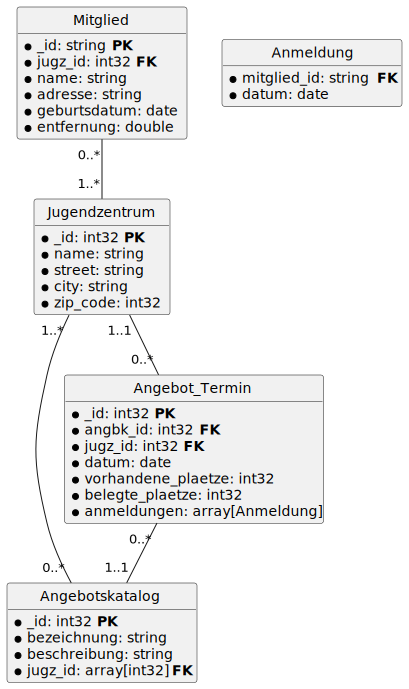

In [387]:
%%plantuml 

@startuml

hide circle
hide members
show fields

class "Jugendzentrum" as jz {
    * _id: int32 **PK**
    * name: string
    * street: string
    * city: string
    * zip_code: int32
}

class "Angebotskatalog" as a {
    * _id: int32 **PK**
    * bezeichnung: string
    * beschreibung: string
    * jugz_id: array[int32] **FK**
}

class "Angebot_Termin" as t {
    * _id: int32 **PK**
    * angbk_id: int32 **FK**
    * jugz_id: int32 **FK**
    * datum: date
    * vorhandene_plaetze: int32
    * belegte_plaetze: int32
    * anmeldungen: array[Anmeldung]
}

class "Anmeldung" as an  {
    * mitglied_id: string **FK**
    * datum: date
}

class "Mitglied" as m {
    * _id: string **PK**
    * jugz_id: int32 **FK**
    * name: string
    * adresse: string
    * geburtsdatum: date
    * entfernung: double
}


jz "1..*" -- "0..*" a
t "0..*" -- "1..1" a
jz "1..1" -- "0..*" t
m "0..*" -- "1..*" jz

@enduml


### Aufgabe 3.4 (2 Punkte)  
    
Nach der Migration der Daten wurde festgestellt, dass Abfragen **R3** und **R4** noch Probleme mit der Performance haben. Wie könnte die "MongoDB-Collection" *Angebot_Termin* erweitert bzw. angepasst werden, dass diese Abfragen möglichst optimal implementiert werden können?

### Aufgabe 3.5 (4 Punkte)

Der landesweite Verband von Jugendzentren hat sich vorgenommen die digitale Präsens weiter auszubauen. Es soll ein Framework für Blogs entwickelt werden. Jedes Mitglied soll Blog-Einträge mit Text und Fotos veröffentlichen können. Andere Nutzer können Einträge "liken" und "disliken" sowie Kommentare zu den Einträgen schreiben.

Der neue Mitarbeiter hat vorgeschlagen hierfür ebenfalls MongoDB als Datenbanksystem zu verwenden, hat dies allerdings noch nicht ausreichend begründet. Helfen Sie indem Sie Gründe für oder gegen die Verwendung von MongoDB als Datenbanksystem angeben. 

### Aufgabe 3.6 (4 Punkte)

Erläutern Sie die wesentlichen Unterschiede zwischen Dokumentorientierten Datenbanksystemen und Column-Family-Datenbanksystemen.

### Aufgabe 3.7 (2 Punkte)

Erläutern Sie das Konzept der aggregatorientierten Modellierung.

## Aufgabe 4 - Technologien für Big Data (5 Punkte)

### Aufgabe 4.1 (2 Punkte)
Sharding: Welche Vor- und Nachteile hat Range-based Sharding in Bezug auf die gleichmäßige Verteilung der Daten über die Knoten und in Bezug auf die Performance von Queries?


### Aufgabe 4.2 (2 Punkte)
Replikation: Welche Vor- und Nachteile hat die asynchrone Replikation? 

### Aufgabe 4.3 (1 Punkt)
Warum verwendet man in In-Memory-Datenbanksystemen zum Aktualisieren von Daten i.A. einen Differential Buffer und ersetzt nicht *in-place*?